<a href="https://colab.research.google.com/github/EOHFA-GOAT/COVID-19/blob/master/Impact%20of%20COVID-19%20on%20the%20Global%20Economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction
In this project, I'll be analyzing and visualizing the impact of COVID-19 on the Global Economy. The data was collected from January 1st, 2020 to November 1st, 2020. 

In [4]:
# import necessary files
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.dates as md
!pip install pycountry_convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 10.1MB 5.4MB/s 
     |████████████████████████████████| 245kB 45.8MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=773e244d375362767961e7633818a542d1d4f77dd139649261191ad4c6243b93
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3.1 which is incompatible.
ERROR: pytest-mock 3.4.0 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3

In [6]:
data = pd.read_csv('/content/drive/MyDrive/covid-19_transformed_data.csv')
data.head(5)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
data['DATE'] = pd.to_datetime(data['DATE'], format = '%Y-%m-%d')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)

This dataset contains at least 210 countries, it presented below on the impact of the COVID-19 pandemic on the global economy of each country.

Note the following:

* CODE
* COUNTRY
* DATE
* HDI : human_development_index
* TC : total_cases
* TD : total_deaths
* STI : stringency_index
* POP : population
* GDPCAP : gdp_per_capita

## Human Development Index (HDI)

The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is also the geometric mean of normalized indices for each of the three dimensions.

Note that the HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The Human Development Report Office (HDRO) offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.

Reference :http://hdr.undp.org/en/content/human-development-index-hdi

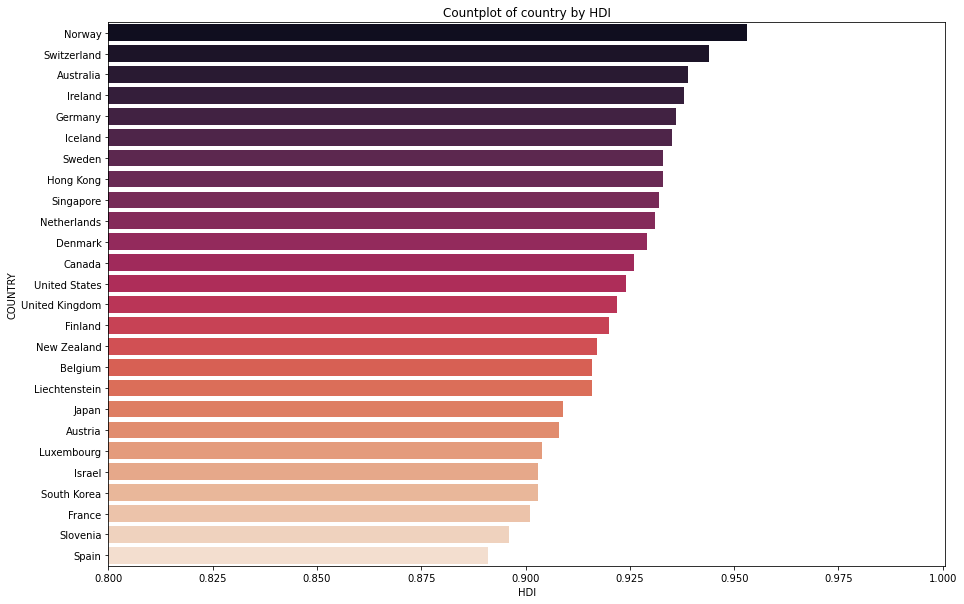

In [8]:
et = data.sort_values(by='HDI', ascending=False)[:7000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.HDI, palette="rocket")
plt.xticks()
plt.xlabel('HDI')
plt.xlim(xmin=0.8)
plt.ylabel('COUNTRY')
plt.title('Countplot of country by HDI')
plt.show()

### Correlation between HDI and GDPCAP, and also the HDI mean


In [9]:
data["HDI"].corr(data["GDPCAP"]), data["HDI"].mean()

(0.7482094801756279, 0.6315531159508068)

## Stringency Index
- This index is among the metrics being used by the Oxford COVID-19 Government Response Tracker, and is a number form 0 to 100 that reflects several indcators such as school and workplace closings, public events, public transport, and stay-at-home policies.
- The response tracker involves a team of 100 Oxford community members who have continuously updated a database of 17 indicators of government response.
-Reference : https://www.civilsdaily.com/news/what-is-stringency-index/

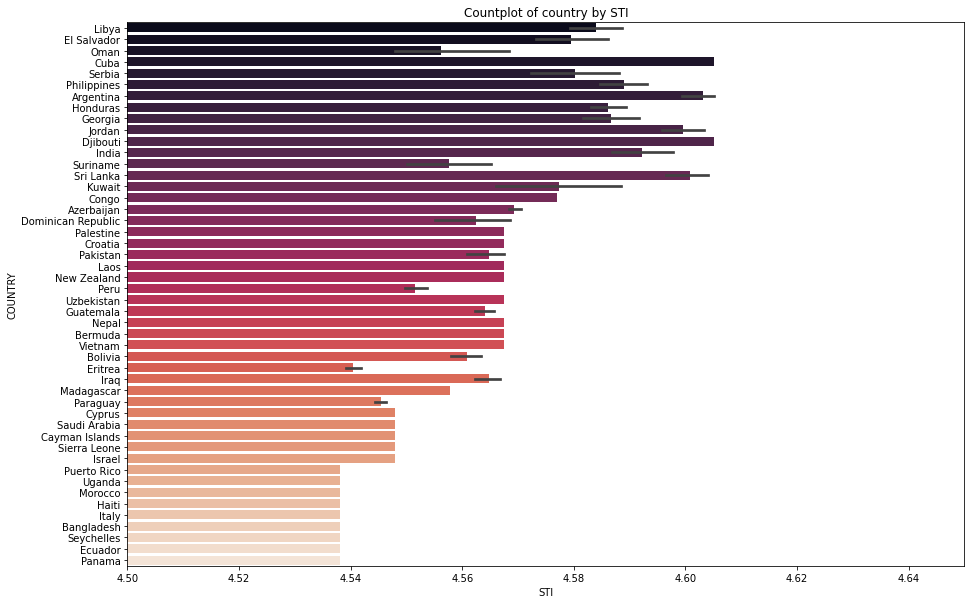

In [10]:
et = data.sort_values(by='STI', ascending=False)[:2000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.STI, palette='rocket')
plt.xticks()
plt.xlim([4.5, 4.65])
plt.xlabel('STI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by STI')
plt.show()

In [11]:
data['STI'].mean()

3.1788969163848186

## GDP Per Capita
A country's Gross Domestic Product (GDP) is calculated by taking into account the monetary worth of a nation's goods and services after a certain period of time, usually one year. It's a measure of economic activity. Often times, rich nations with smaller populations tend to have higher per capita GDP.

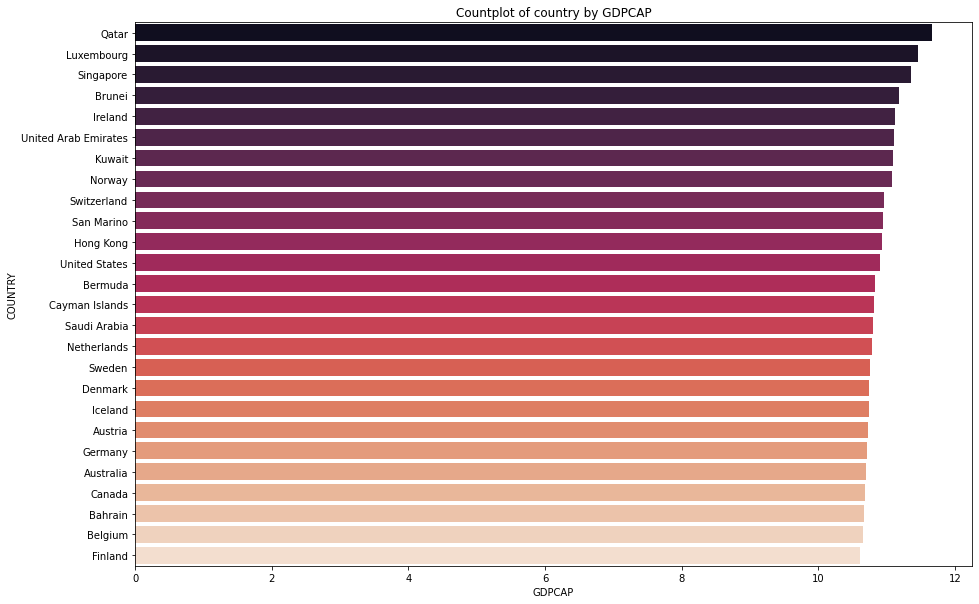

In [12]:
et = data.sort_values(by='GDPCAP', ascending=False)[:7000]
figure = plt.figure(figsize=(15,10))
sns.barplot(y=et.COUNTRY, x=et.GDPCAP, palette='rocket')
plt.xticks()
plt.xlabel('GDPCAP')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by GDPCAP')
plt.show()

# The impact of the COVID-19 pandemic of each country

In [13]:
@interact
def data_show(country=sorted(set(data['COUNTRY']))):
    HDI= data[data['COUNTRY']==country]['HDI'].max()*10
    GDPCAP = data[data['COUNTRY']==country]['GDPCAP'].mean()
    POP= data[data['COUNTRY']==country]['POP'].max()

    total1= [HDI, GDPCAP, POP]

    TD= data[data['COUNTRY']==country].groupby(['DATE']).agg({'TD':['sum']})
    TC = data[data['COUNTRY']==country].groupby(['DATE']).agg({'TC':['sum']})
    STI = data[data['COUNTRY']==country].groupby(['DATE']).agg({'STI':['sum']})

    total2 = TD.join(TC).join(STI)

    plt.figure(figsize=(15,10))
    plt.subplot(121)
    names = ['HDI','GDPCAP', 'POP']
    plt.bar(names, total1)
    plt.ylabel("Counts", size=13)

    plt.subplot(122)
    total2.plot(ax=plt.gca(), title=country)
    plt.ylim((0, 16))
    # setting the max value to see the data in the same env
    plt.ylabel("Counts", size=13)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

A basic  graph from the total cases vs total deaths also the STI with green

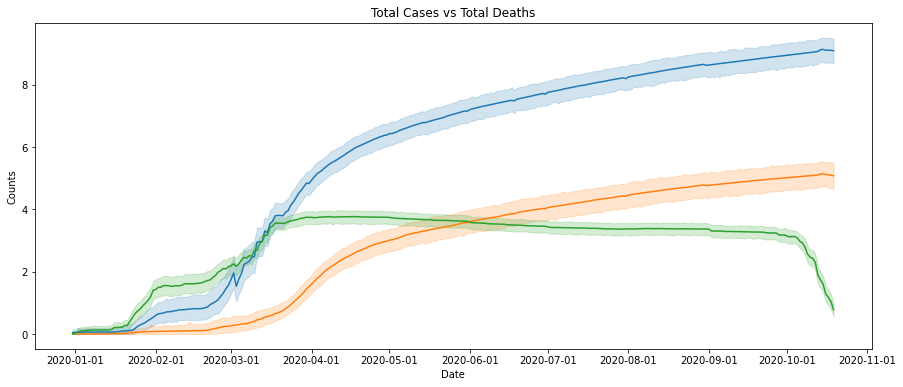

In [14]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(x=data["DATE"], y=data["TC"])
sns.lineplot(x=data["DATE"], y=data["TD"])
sns.lineplot(x=data["DATE"], y=data["STI"])

ax.set_title("Total Cases vs Total Deaths")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

The correlation between the total cases and deaths

In [16]:
data["TC"].corr(data["TD"])

0.9183722940131004

## Total cases by countries over time


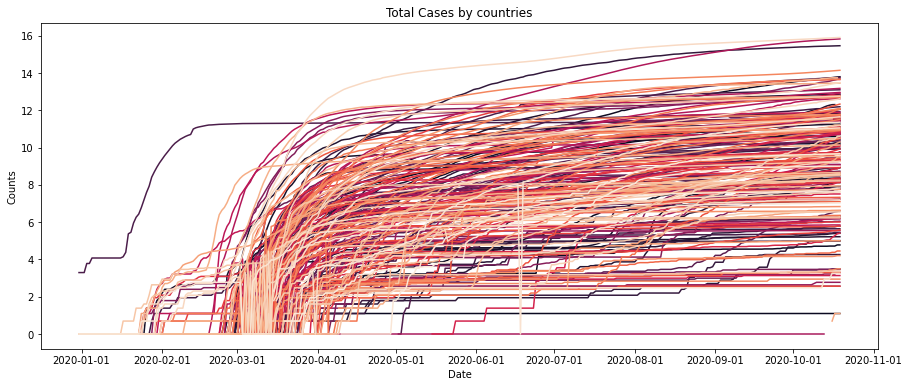

In [17]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data=data, x='DATE', y='TC', hue='COUNTRY', legend=False, palette='rocket')

ax.set_title("Total Cases by countries")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

In [18]:
x=[]
for i in range(len(data)):
    if data['TC'].values[i]!=0:
        x.append(data['TD'].values[i]/data['TC'].values[i])
    else:
        x.append(0)
data['Ratio']=x
# adding the ratios between TCs and TDs

In [19]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

In [20]:
data['CONTINENT'] = data['COUNTRY'].apply(get_continent)

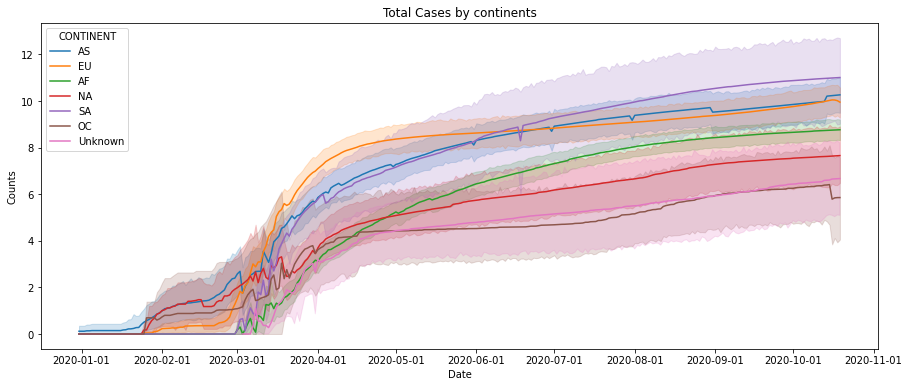

In [21]:
fig, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data=data, x='DATE', y='TC', hue='CONTINENT')

ax.set_title("Total Cases by continents")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

I'll now make an interactive version by continent and add the TD and the ratios between
* AF - Africa
* AS - Asia
* EU - Europe
* NA - North America
* OC - Oceania
* SA - South America

In [22]:
@interact
def data_show(continent=sorted(set(data['CONTINENT']))):
    fig, ax = plt.subplots(figsize = (15, 6))

    sns.lineplot(x=data['DATE'], y=data[data['CONTINENT'] == continent]['TC'])
    sns.lineplot(x=data['DATE'], y=data[data['CONTINENT'] == continent]['TD'])
    sns.lineplot(x=data['DATE'], y=data[data['CONTINENT'] == continent]['Ratio'])

    ax.set_title(f"{continent}  TC vs TD and the ratio between them")
    ax.set_xlabel("Date")
    plt.ylim((0, 11))
    # setting the max value to see the data in the same env
    ax.set_ylabel("Counts")

interactive(children=(Dropdown(description='continent', options=('AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'Unknown'…

##Conclusion

As we now enter 2021, I am looking forward to see declines in both COVID-19 deaths and cases, as well as to see increases in GDP as people go back to their pre-COVID lives. While 2020 has been one hell of a year, nevertheless I remain hopeful that 2021 will bring a time of renewal, peace, and joy.

Emini Offutt, Hume-Fogg Academic High School, C/O 2021

3 January 2021